In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
BLEU_list = []
BP_list = []

for i in range(1, 26):
    # read json file
    with open('{}/score.txt'.format(i)) as f:
        data = json.load(f)
        bleu = data['score']
        verbose_score = data['verbose_score']
        parts = verbose_score.split()
        bp = 0
        for part in parts:
            if part.startswith('(BP'):
                # bp is the next next part
                bp = float(parts[parts.index(part) + 2])
                break
        BLEU_list.append(bleu)
        BP_list.append(bp)

In [3]:
print(BLEU_list)

[16.1, 17.8, 18.1, 17.5, 18.8, 18.5, 19.6, 19.5, 20.7, 20.9, 21.2, 20.9, 21.3, 21.2, 20.7, 20.7, 20.7, 20.7, 20.5, 20.4, 20.2, 20.2, 20.0, 19.9, 20.1]


In [4]:
print(BP_list)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.988, 0.974, 0.948, 0.934, 0.921, 0.92, 0.874, 0.864, 0.847, 0.841, 0.83, 0.819, 0.789]


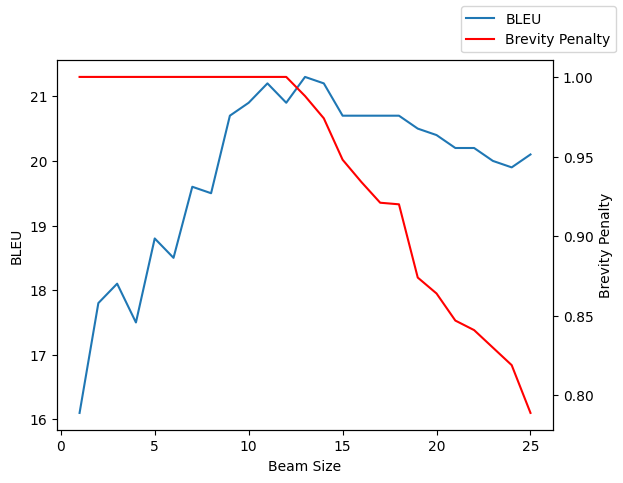

In [5]:
fig, ax1 = plt.subplots()
ax1.plot(range(1, 26), BLEU_list)
ax1.set_xlabel('Beam Size')
ax1.set_ylabel('BLEU')

ax2 = ax1.twinx()
ax2.plot(range(1, 26), BP_list, 'r')
ax2.set_ylabel('Brevity Penalty')

fig.legend(['BLEU', 'Brevity Penalty'], loc='upper right')
fig.savefig('BLEU_BP.png')